# Train first model
In this jupyter notebook, we will train the first model on the MNIST-dataset. The MNIST-dataset contains 70,000 images (28 x 28 pixels) of handwritten digits. We will use a Convolutional neural network as a model which we will define using the Keras API running on Tensorflow. The MNIST-dataset comes with the Keras API but can also be downloaded from http://yann.lecun.com/exdb/mnist/. I'll also take the chance to thank the authors LeCun, Cortes and Burges for this amazing "Hello World"-dataset of image recognition.


We start by installing useful dependencies and importing libraries.

In [ ]:
# Install useful dependencies
!pip3 install --upgrade numpy
!pip3 install --upgrade keras
!pip3 install --upgrade tensorflow
!pip3 install --upgrade matplotlib

In [1]:
# Importing useful libraries
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 50

# Input image dimensions
img_rows, img_cols = 28, 28

Using TensorFlow backend.


In [2]:
# Import the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizing the input and reshaping
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test = X_test.astype('float32')
X_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [3]:
# Define the model as a convolutional neural network.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
# Applying transformation to image
train_gen = ImageDataGenerator(rotation_range=8,
                               width_shift_range=0.08,
                               shear_range=0.3,
                               height_shift_range=0.08,
                               zoom_range=0.08)
test_gen = ImageDataGenerator()
training_set = train_gen.flow(X_train, y_train, batch_size=BATCH_SIZE)
test_set = train_gen.flow(X_test, y_test, batch_size=BATCH_SIZE)

## Training the model
We will use an earlystopper, which is a functionality provided by the Keras API. We can specify the earlystopper to monitor the validation loss. Once the validation loss stops improving (decreasing), the earlystopper stops the training session to mitigate the risk of overfitting.

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
468/468 [==============================] - 40s 86ms/step - loss: 0.4470 - acc: 0.8600 - val_loss: 0.1048 - val_acc: 0.9684
Epoch 2/50
468/468 [==============================] - 35s 75ms/step - loss: 0.1721 - acc: 0.9479 - val_loss: 0.0824 - val_acc: 0.9736
Epoch 3/50
468/468 [==============================] - 35s 75ms/step - loss: 0.1339 - acc: 0.9599 - val_loss: 0.0598 - val_acc: 0.9806
Epoch 4/50
468/468 [==============================] - 37s 79ms/step - loss: 0.1150 - acc: 0.9657 - val_loss: 0.0518 - val_acc: 0.9831
Epoch 5/50
468/468 [==============================] - 38s 81ms/step - loss: 0.1022 - acc: 0.9699 - val_loss: 0.0483 - val_acc: 0.9842
Epoch 6/50
468/468 [==============================] - 38s 82ms/step - loss: 0.0968 - acc: 0.9714 - val_loss: 0.0483 - val_acc: 0.9848
Epoch 7/50
468/468 [==============================] - 39s 83ms/step - loss: 0.0912 - acc: 0.9732 - val_loss: 0.0393 - val_acc: 0.9867
Epoch 8/50
468

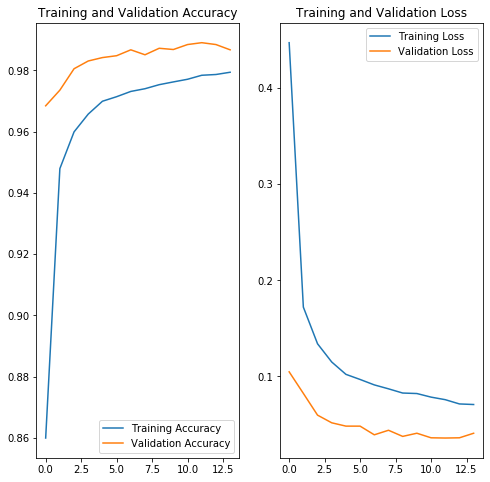

In [5]:
# Fit the model
earlystopper = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1)
session = model.fit_generator(training_set,
                         steps_per_epoch=60000//BATCH_SIZE,
                         validation_data=test_set,
                         validation_steps=10000//BATCH_SIZE,
                         epochs=EPOCHS,
                         callbacks=[earlystopper])

acc = session.history['acc']
val_acc = session.history['val_acc']

loss = session.history['loss']
val_loss = session.history['val_loss']

epochs_range = range(len(acc))

# Plot the accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We can see that we get an amazing accuracy of 98% on both the training and the validation set, with the validation set having a little better accuracy. We can also see that earlystopper kicked in and we see no signs of overfitting in the two plots above. Lastly, we have to save the model so we can import it in the next jupyter-notebook, where we will use Transfer learning to train our final model.

In [6]:
model.save("Trained model")